In [6]:
print("hello world")

hello world


In [7]:
from fastcore.foundation import L
from fastcore.xtras import Path # @patch'd properties to the Pathlib module

from fastai.callback.schedule import fit_one_cycle, lr_find

from fastai.data.block import CategoryBlock, DataBlock
from fastai.data.transforms import get_image_files, RandomSplitter

from fastai.learner import Learner

from fastai.metrics import error_rate
from torchvision.models.resnet import resnet34
import torchvision.models as torch_models


from fastai.vision.all import (
    aug_transforms,
    ImageBlock,
    RegressionBlock,
    vision_learner,
    PILImage,
)

import json
import matplotlib.pyplot as plt

In [8]:
image_path = '../data/initData/09-09-2022_19-16-07'
Path(image_path).exists()
test_path = Path(image_path + '/2022-09-09T19%3A16%3A07.386154.png')
print(test_path)

..\data\initData\09-09-2022_19-16-07\2022-09-09T19%3A16%3A07.386154.png


In [9]:
def read_json(image):
    with open(Path(image_path)/f'{image.stem}.json') as file:
        json_file = json.load(file)
        return [float(json_file['steering']), float(json_file['throttle'])]
print(read_json(test_path))

[-0.13, -0.010000000000000009]


<AxesSubplot: >

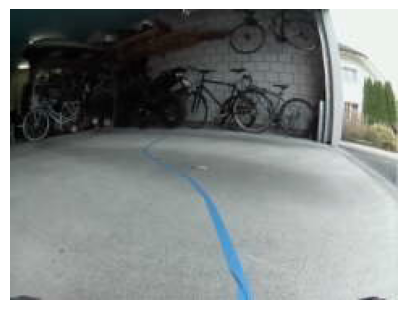

In [10]:
image = PILImage.create(test_path)
image.show()

In [11]:
data_block = DataBlock(blocks=(ImageBlock, RegressionBlock(n_out=2)),
                       get_items=get_image_files,
                       splitter=RandomSplitter(),
                       get_y=read_json)

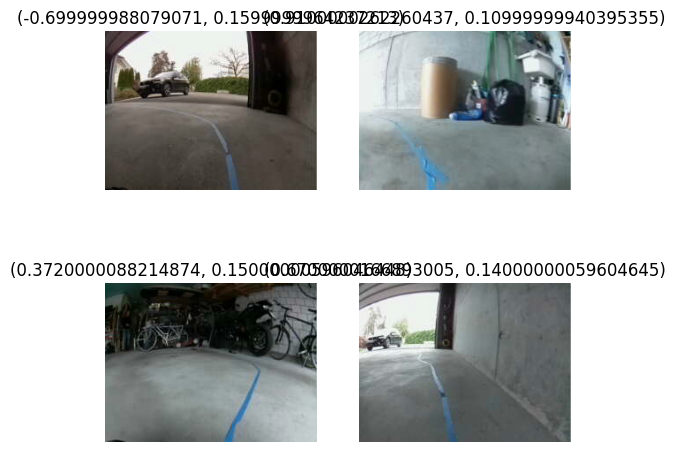

In [12]:
data_loader = data_block.dataloaders(Path(image_path), bs=4)
data_loader.show_batch()

In [13]:
learn = vision_learner(data_loader, resnet34)

C:\Users\fabio\OneDrive\Dokumente\Python\AI-Challenge-Magic-Smoke\venv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\fabio\OneDrive\Dokumente\Python\AI-Challenge-Magic-Smoke\venv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to C:\Users\fabio/.cache\torch\hub\checkpoints\resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

SuggestedLRs(valley=0.001737800776027143)

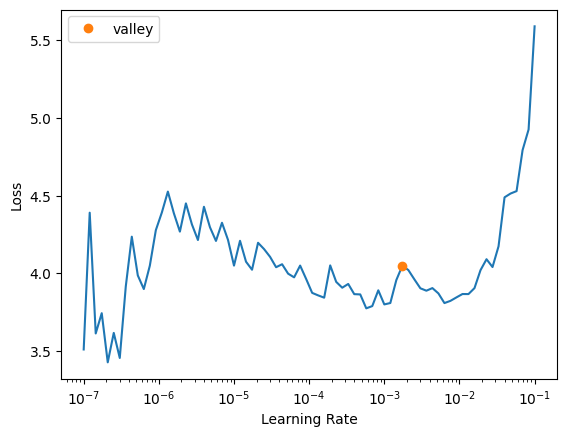

In [14]:
learn.lr_find()
lr = 3.630780702224001e-05
learn.fine_tune()